In [8]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
from preprocessing import get_all_sheet_names, read_excel_by_sheet
from intervals import mean_pellet_collect_time, plot_retrieval_time_by_block, perform_T_test
from path import *
import os

export_root = '../export/Figure 3'
os.makedirs(export_root, exist_ok=True)
action_prop = 0.25
block_prop = 0.6
meal_config=[60, 2]
day = 3

In [9]:
female_scores = []
female_learning_result = []

for sheet in rev_female_sheets:
    data = read_excel_by_sheet(sheet, rev_female_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    # dit.graph_learning_trend_by_activity(data_stats, blocks, path=sheet, block_prop=block_prop, action_prop=action_prop, export_root=export_root)
    female_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    female_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

Female Size: 20
Female Average: 40.90668883765128
Female Standard Error: 1.3228164807534843


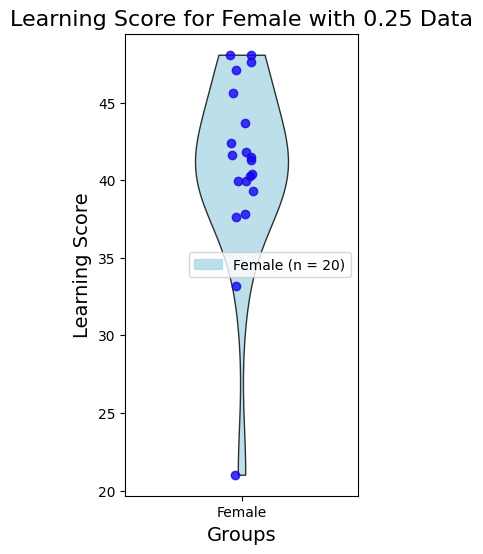

In [10]:
dit.graph_learning_score_single(female_scores, group_name='Female', proportion=action_prop, 
                                export_path=os.path.join(export_root, f'WT_{int(action_prop*100)}_learning_score.svg'))

Female Size: 20
Female Average: 59.06804842968275
Female Standard Error: 0.7313539820856806


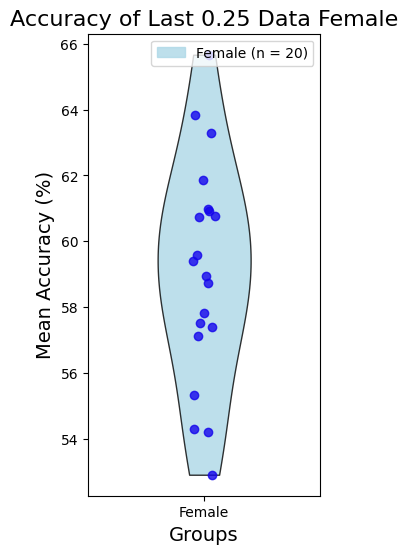

In [11]:
dit.graph_learning_results_single(female_learning_result, proportion=0.25, group_name='Female',
                                export_path=os.path.join(export_root, 'WT_learning_result.svg'))

### Pellet Collect Time

In [12]:
export_root = '../export/Figure 4'
os.makedirs(os.path.join(export_root, 'WT_retrieval_time'), exist_ok=True)

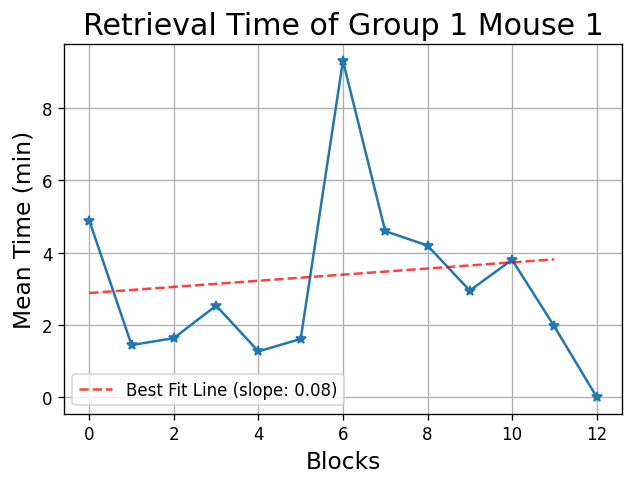

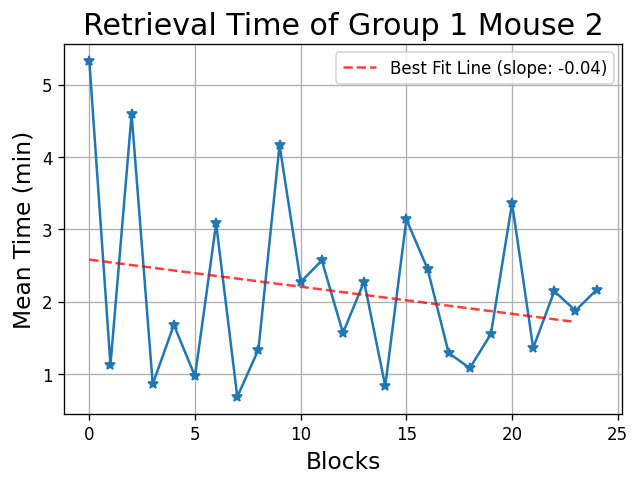

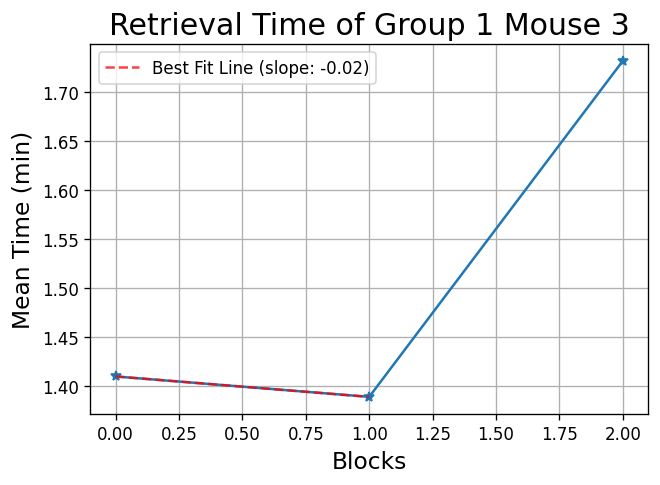

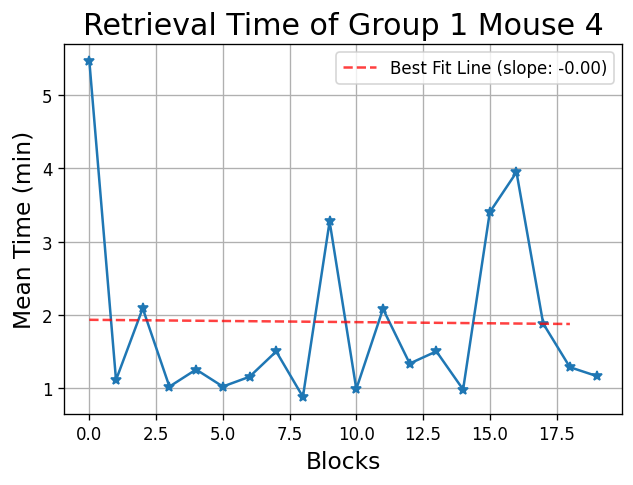

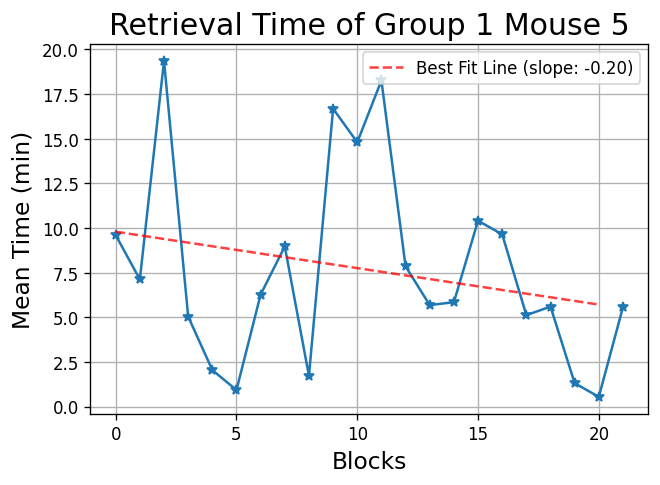

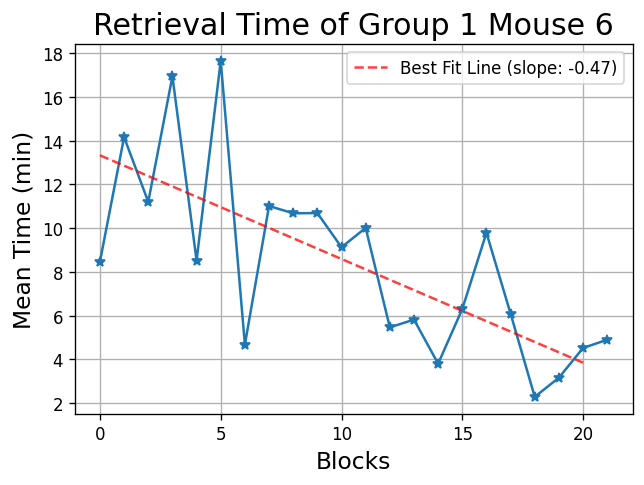

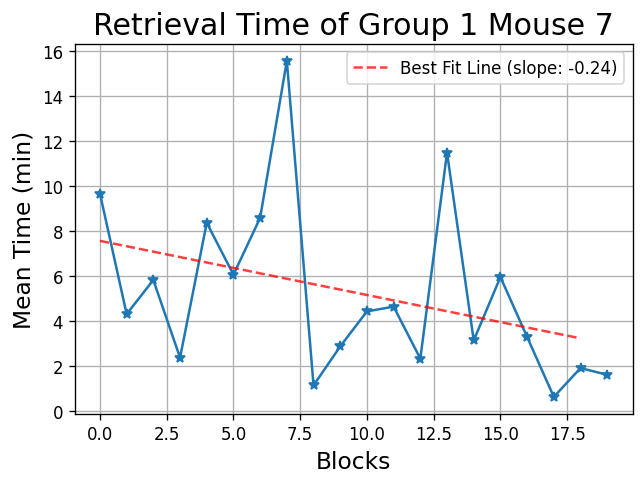

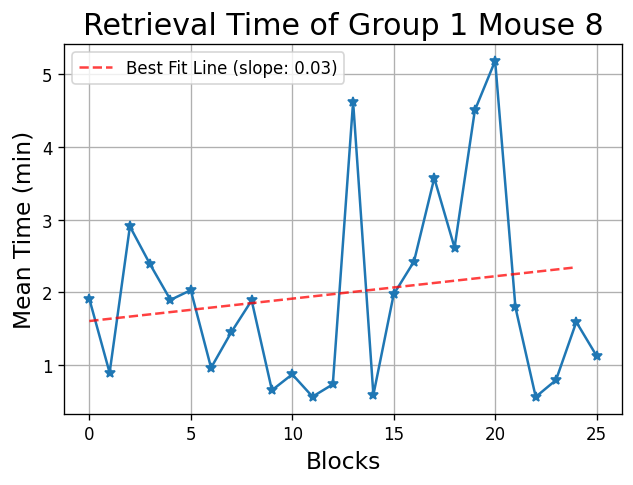

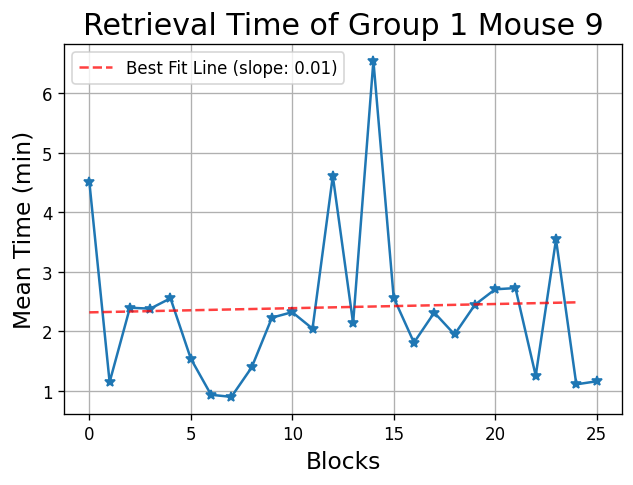

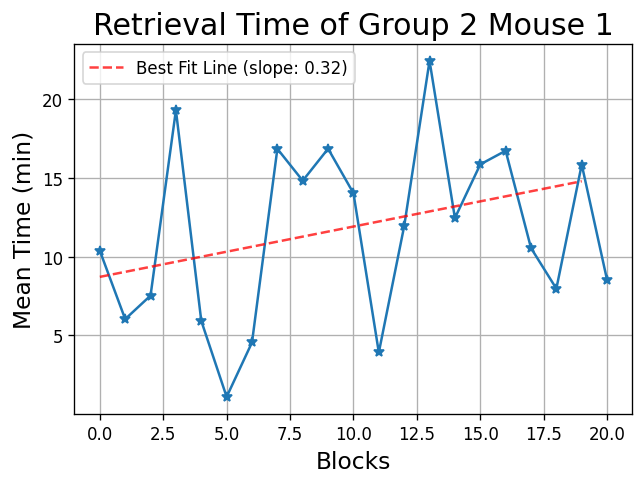

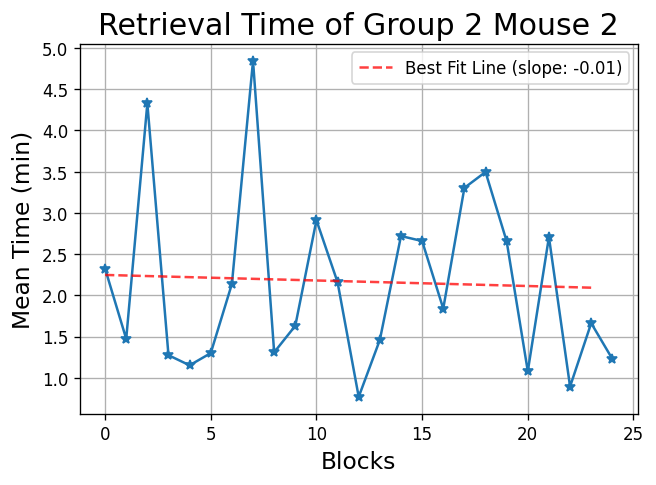

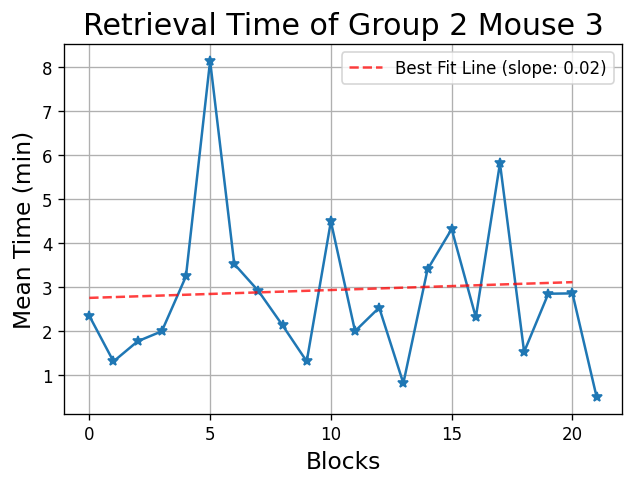

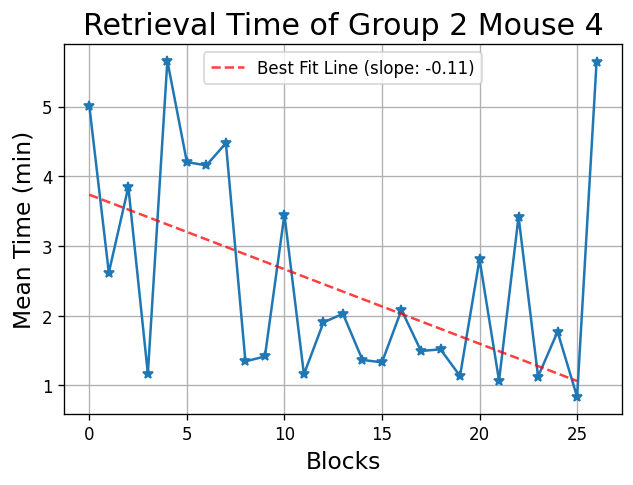

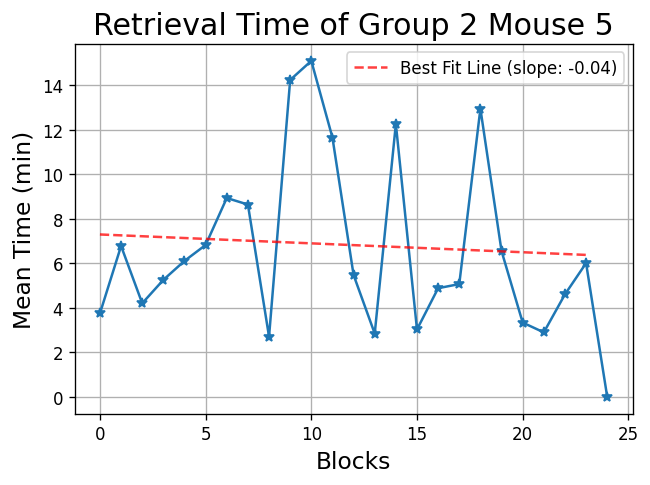

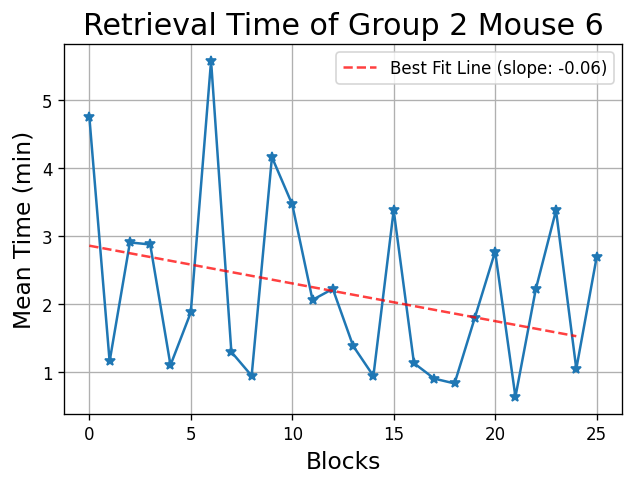

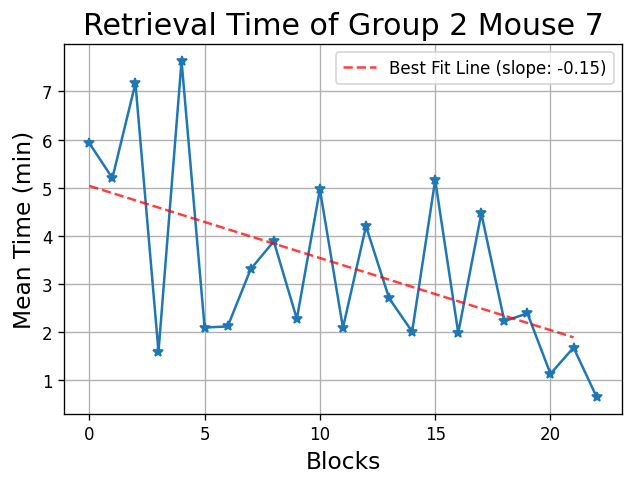

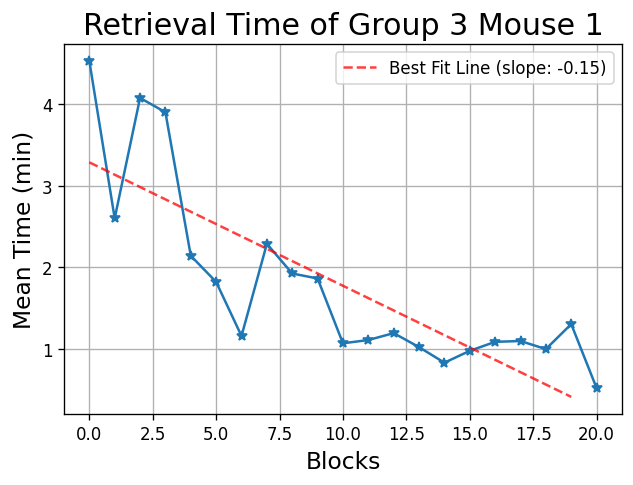

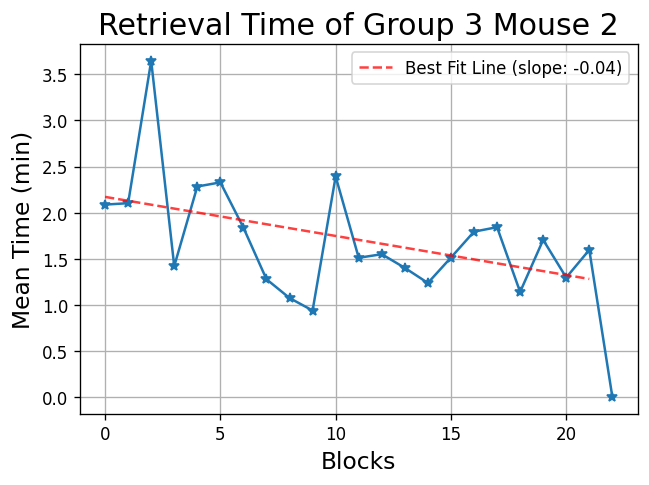

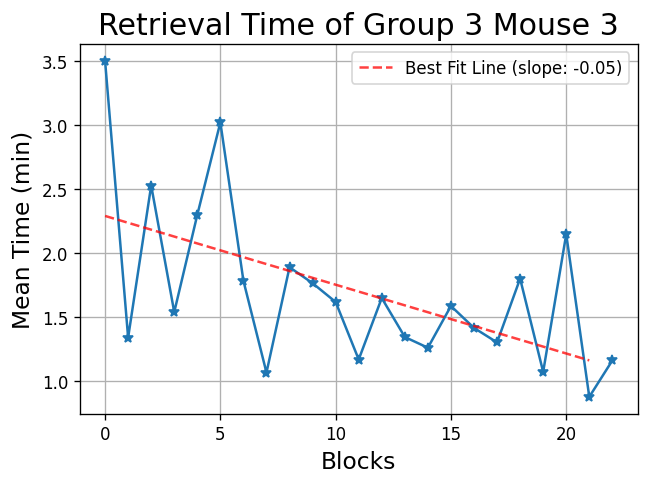

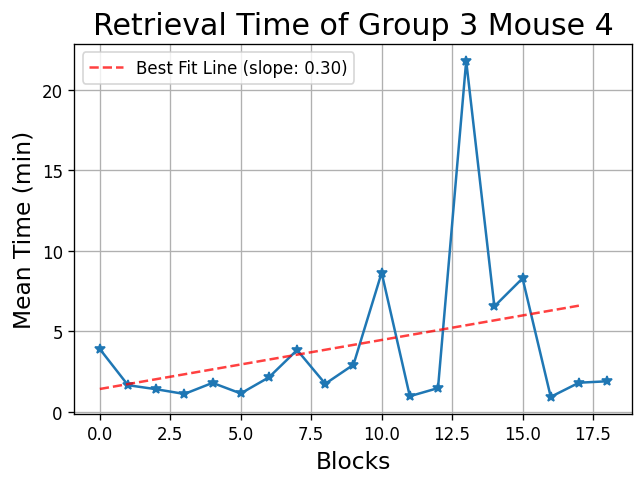

In [13]:
female_all_times = []
female_mean = []
female_pred = []
female_slope= []
rev_female_time_dict = {}

for sheet in rev_female_sheets[:]:
    times, mean, std = mean_pellet_collect_time(rev_female_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(rev_female_path, sheet, day=day, n_stds=3, 
                                        export_path=os.path.join(export_root, 'WT_retrieval_time', f'female_{sheet}.svg'))
    female_all_times.append(times)
    female_all_times.append(times)
    female_mean.append(mean)
    female_pred.append(pred)
    female_slope.append(slope)
    rev_female_time_dict[sheet] = mean

Female Size: 20
Female Average: 3.7369105387594272
Female Standard Error: 0.6077483661880347


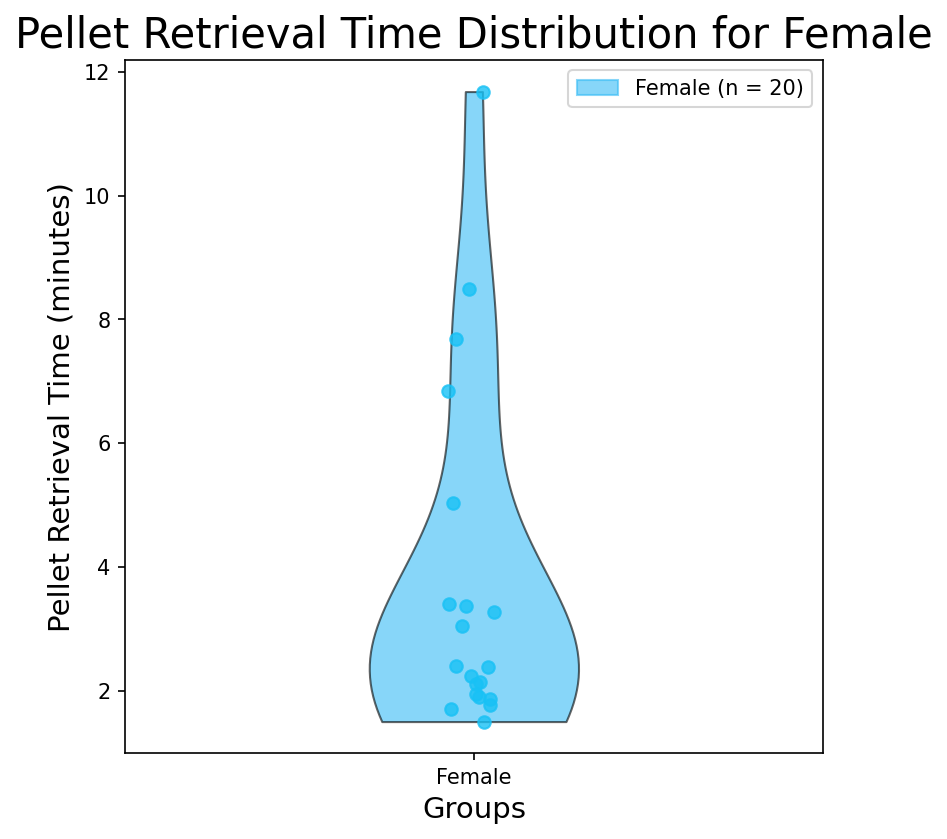

In [14]:
from accuracy import graph_single_stats
graph_single_stats(female_mean, 'Pellet Retrieval Time',  group_name='Female', unit='minutes', violin_width=0.3,
                  export_path=os.path.join(export_root, 'wt_retrieval_mean.svg'))

In [22]:
female_pred.remove(max(female_pred))

Female Size: 19
Female Average: 2.673737001498757
Female Standard Error: 0.41112016972212856


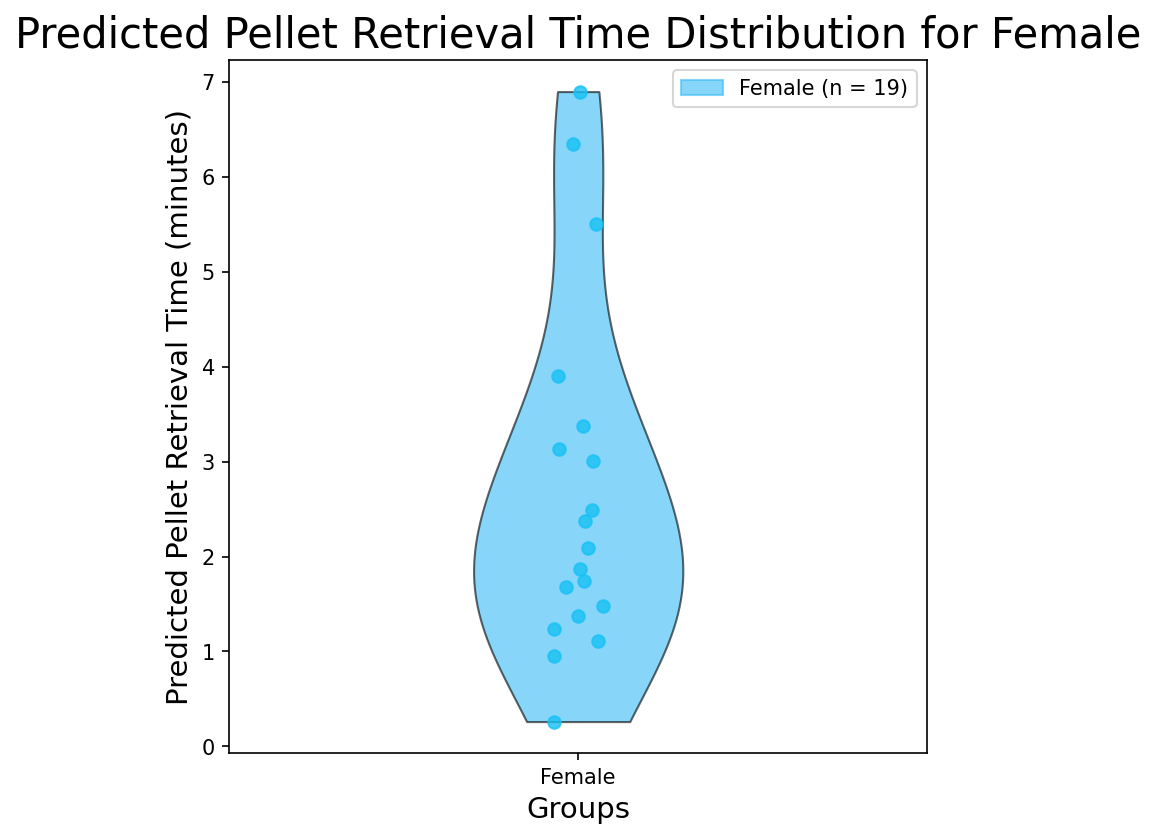

In [23]:
graph_single_stats(female_pred, 'Predicted Pellet Retrieval Time', group_name='Female', unit='minutes',violin_width=0.3,
                  export_path=os.path.join(export_root, 'wt_retrieval_pred.svg'))

Female Size: 20
Female Average: -0.041
Female Standard Error: 0.03720147846524382


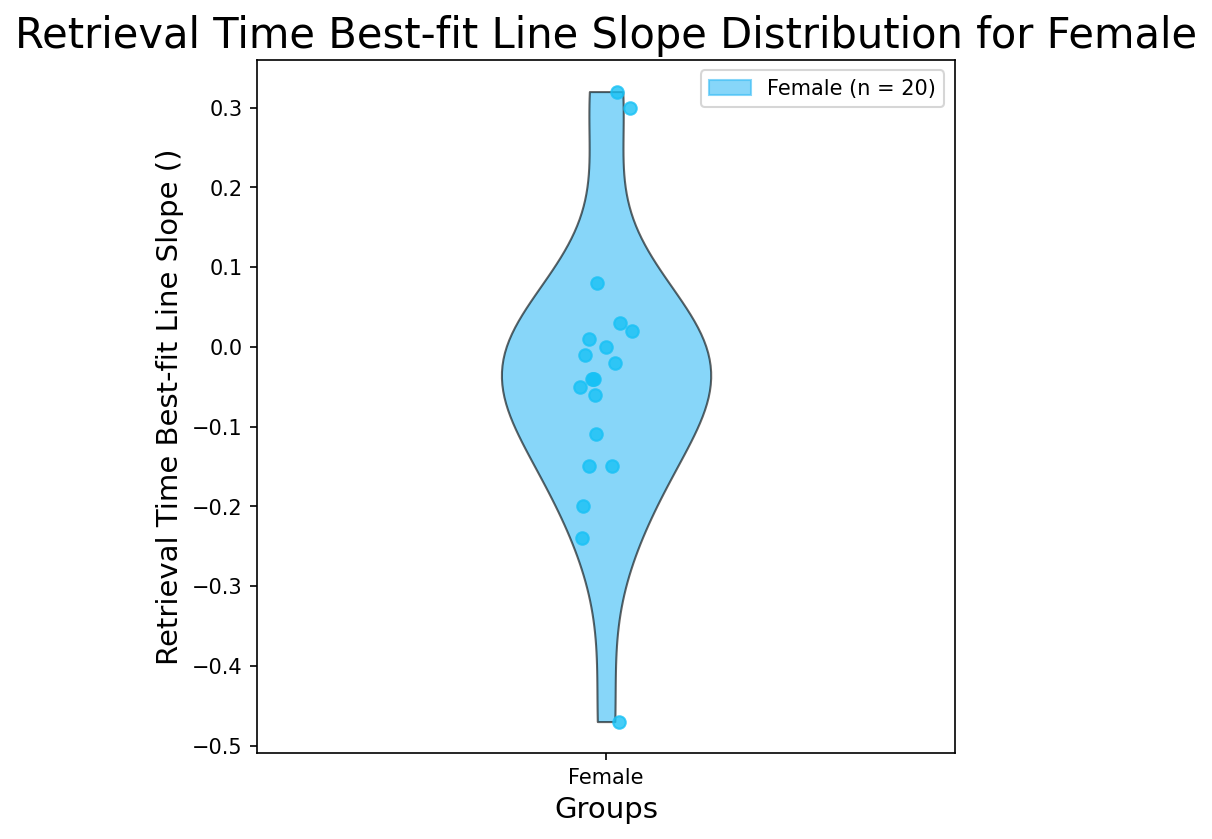

In [16]:
graph_single_stats(female_slope, 'Retrieval Time Best-fit Line Slope', group_name='Female', unit='', violin_width=0.3,
                  export_path=os.path.join(export_root, 'wt_retrieval_slope.svg'))

In [17]:
female_all_times = []
female_means = []
female_stds = []
fr1_female_dict = {}

for sheet in fr1_female_sheets:
    times, mean, std = mean_pellet_collect_time(fr1_female_path, sheet, remove_outlier=True, n_stds=2, day=3)
    female_all_times.append(times)
    female_means.append(mean)
    female_stds.append(std)
    fr1_female_dict[sheet] = mean

In [20]:
female_means.remove(max(female_means))
female_means.remove(max(female_means))

Female Size: 15
Female Average: 4.203204019872816
Female Standard Error: 0.30395907936865846


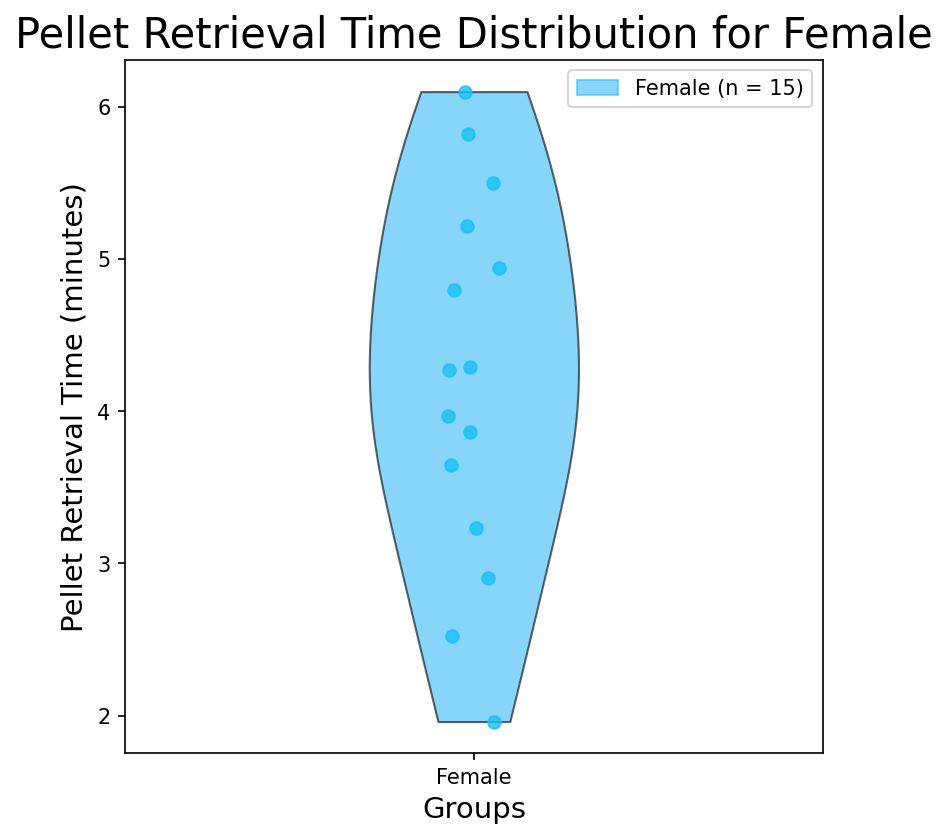

In [21]:
graph_single_stats(female_means, 'Pellet Retrieval Time', group_name='Female', unit='minutes',violin_width=0.3,
                  export_path=os.path.join(export_root, 'wt_fr1_retrieval_mean.svg'))

## Correlation

In [24]:
import numpy as np
import pickle

fr1_male_acc, fr1_female_acc = pickle.load(open('../data/wt_fr1_acc.pkl', 'rb'))

shared_fr1_male_acc = []
shared_fr1_female_acc = []
shared_rev_male_dict = []
shared_rev_female_dict = []

full_fr1_male_acc = []
full_fr1_female_acc = []
full_fr1_male_time = []
full_fr1_female_time = []

# reversal retrieval time vs. FR1 accuracy
for each in np.intersect1d(list(rev_female_time_dict.keys()), list(fr1_female_acc.keys())):
    shared_fr1_female_acc.append(fr1_female_acc[each])
    shared_rev_female_dict.append(rev_female_time_dict[each])


# FR1 accuracy vs FR1 retrieval time
for key, value in fr1_female_acc.items():
    full_fr1_female_acc.append(value)
    full_fr1_female_time.append(fr1_female_dict[key])
    

In [25]:
np.corrcoef(shared_fr1_female_acc, shared_rev_female_dict)[0, 1]

0.09323499050807943

In [27]:
np.corrcoef(full_fr1_female_acc, full_fr1_female_time)[0, 1]

-0.12235588064465988